In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = cv2.imread("./img/lena.jpg")

In [3]:
img.shape

(220, 331, 3)

# 获取像素

In [5]:
px = img[100, 90]

In [6]:
print("px=", px)
print("px_blue=", img[100, 90, 0])


px= [234 228 223]
px_blue= 234


In [7]:
print(img.dtype)

uint8


# 颜色空间转换

# 阈值分割

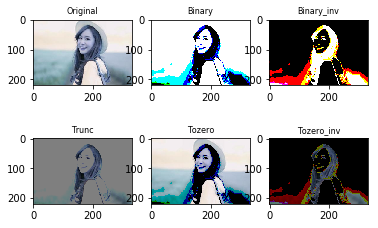

In [10]:
# 应用5中不同阈值的方式
# 看得出来固定阈值是在整幅图片上应用一个阈值进行分割，它并不适用于明暗分布不均的图片
titles = ['Original', 'Binary', 'Binary_inv', 'Trunc', 'Tozero', 'Tozero_inv']
ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, th2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, th3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, th4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, th5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)
images = [img, th1, th2, th3, th4, th5]

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i], fontsize=8)

plt.show()

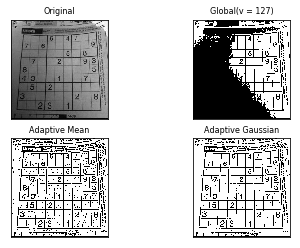

In [11]:
# 自适应阈值
# cv2.threshold()用来进行固定阈值分割。固定阈值不适用于光线不均匀的图片，
# 所以用 cv2.adaptiveThreshold()进行自适应阈值分割。 二值化跟阈值分割并不等同。
# 针对不同的图片，可以采用不同的阈值方法

img = cv2.imread("./img/threshold_1.jpg", 0)
# 固定阈值
ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# 自适应阈值
# 参数1：要处理的原图
# 参数2：最大阈值，一般为255
# 参数3：小区域阈值的计算方式
# ADAPTIVE_THRESH_MEAN_C：小区域内取均值
# ADAPTIVE_THRESH_GAUSSIAN_C：小区域内加权求和，权重是个高斯核
# 参数4：阈值方式（跟前面讲的那5种相同）
# 参数5：小区域的面积，如11就是11*11的小块
# 参数6：最终阈值等于小区域计算出的阈值再减去此值
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 4)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 7, 6)
titles = ['Original', 'Global(v = 127)', 'Adaptive Mean', 'Adaptive Gaussian']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i], fontsize=8)
    plt.xticks([]), plt.yticks([])
plt.show()

# 图形几何变换

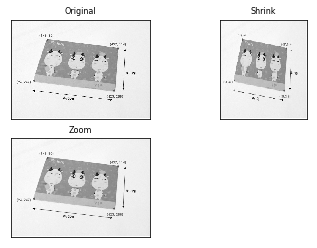

In [13]:

# 缩放图片：cv2.resize
# 翻转图片(水平/垂直/水平垂直)：cv2.flip
# 平移/旋转图片： cv2.warpAffine
img = cv2.imread("./img/geometrical_transform.jpg", 0)

# 按指定宽度、高度缩放图片
res = cv2.resize(img, (132, 150))
# 按比例缩放
res1 = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
titles = ['Original', 'Shrink', 'Zoom']
images = [img, res, res1]
for i in range(3):
    plt.subplot(2, 2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i], fontsize=8)
    plt.xticks([]), plt.yticks([])
plt.show()


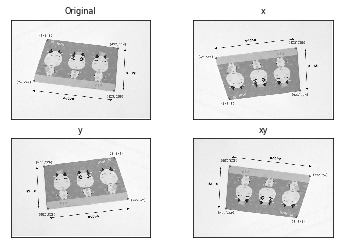

In [15]:
# 翻转图片
# cv2.flip 参数2 = 0：垂直翻转(沿x轴)，参数2 > 0: 水平翻转(沿y轴)，参数2 < 0: 水平垂直翻转
res = cv2.flip(img, 0)
res1 = cv2.flip(img, 1)
res2 = cv2.flip(img, -1)
titles = ['Original', 'x', 'y', 'xy']
images = [img, res, res1, res2]
for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i], fontsize=8)
    plt.xticks([]), plt.yticks([])
plt.show()



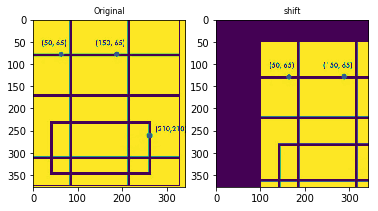

In [32]:
# 平移图片
img = cv2.imread("./img/warpAffine.jpg", 0)
rows, cols = img.shape[:2]
# 定义平移矩阵，需要是numpy的float32类型
# x轴平移100，y轴平移50
M = np.float32([[1,0,100], [0,1,50]])
# 用仿射变化实现平移
dst = cv2.warpAffine(img, M, (cols, rows))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original", fontsize=8)
plt.subplot(1, 2, 2)
plt.imshow(dst)
plt.title("shift", fontsize=8)
plt.show()

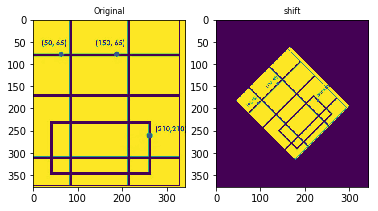

In [33]:
# 旋转图片
# OpenCV直接提供了 cv2.getRotationMatrix2D()函数来生成这个矩阵，
# 该函数有三个参数：

# 参数1：图片的旋转中心
# 参数2：旋转角度(正：逆时针，负：顺时针)
# 参数3：缩放比例，0.5表示缩小一半

# 45°旋转图片并缩小一半
M = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 0.5)
dst = cv2.warpAffine(img, M, (cols, rows))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original", fontsize=8)
plt.subplot(1, 2, 2)
plt.imshow(dst)
plt.title("shift", fontsize=8)
plt.show()

# 绘图功能（画线/画圆/画矩形/添加文字）

# 代码性能优化

In [35]:
# method1

import cv2
start = cv2.getTickCount()
# 这里写测试代码...

end = cv2.getTickCount()
print((end - start) / cv2.getTickFrequency())

4.423e-05


In [36]:
# method2
import time
start = time.clock()

# 这里写测试代码...

end = time.clock()
print(end - start)

2.9999999999752447e-05


In [37]:
# method3
# jupyter or ipython for timing and profiling

# 平滑图像

In [ ]:
# 模糊/平滑图片： 消除图片噪点

# 卷积

# 滤波和模糊
## 滤波和模糊都属于卷积，不同的滤波方法之间只是卷积核不同(对于现行滤波而言)
## 模糊： 低通滤波器是模糊
## 锐化： 高通滤波器是锐化

## 低通滤波器：是允许低频信号通过，在图像中边缘和噪声都相当于高频部分，所以低频滤波器用于去除噪点、平滑模糊图像
## 高通滤波器：用于增强图像边缘，进行锐化处理

# 噪声
## 椒盐噪声：可以理解为斑点，随机出现在图像中的黑点或者白点
## 高斯噪声：可以理解为拍摄图片时由于光照等原因造成的

# 常用的滤波器

## 均值滤波：卷积区域中元素的均值，cv2.blur实现
## 方框滤波：cv2.boxFilter. normalize=True,方框滤波为均值滤波; normalize=False，相当于求区域内的像素和
## 高斯滤波：均值和方框滤波卷积内每个像素值得权重都一样，而高斯滤波的卷积核权重不相同，中间像素的权重最大，越远离中心的像素权重越小
##                cv2.GaussianBlur(src,ksize,sigmaX)，sigmaX值越大，模糊效果越明显
## 中值滤波：用区域内的中位数替代本像素的值，所以那种孤立的斑点，如果0或255很容易消除掉，适用于去除斑点和椒盐噪声。非线性操作，效率比价慢
## 双边滤波：cv2.bilateralFilter实现。模糊操作基本都会损失掉图像中的细节信息，尤其是前面介绍的现行滤波器，图像的边缘信息很难保留下来。而边缘
##                信息是图像中很重要的一个特征，所以才有了双边滤波

# 选择滤波器
## 在不知道用什么滤波器好的时候，优先高斯滤波cv2.GaussianBlur()，然后均值滤波cv2.blur()。
## 斑点和椒盐噪声优先使用中值滤波cv2.medianBlur()。
## 要去除噪点的同时尽可能保留更多的边缘信息，使用双边滤波cv2.bilateralFilter()。
## 线性滤波方式：均值滤波、方框滤波、高斯滤波（速度相对快）。
## 非线性滤波方式：中值滤波、双边滤波（速度相对慢）。
